# 1. Data Cleaning and EDA with Time Series Data

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# importing additional libraries

## 1.1 Load and clean the data

In [9]:
dataframe_raw = pd.read_csv("Weather prediction data.txt", delimiter = ",")

In [4]:
print(type(dataframe_raw))

<class 'pandas.core.frame.DataFrame'>


In [11]:
# Add a new column to the data frame with the desired values
# dataframe_raw['temperature_pred'] = 7.77
dataframe_raw['temperature_pred'] = [random.uniform(5,8) for _ in range(len(dataframe_raw))]

# Save the updated data frame to a new CSV file
dataframe_raw.to_csv('Weather prediction data temp_pred.csv', index=False)

In [5]:
dataframe_raw.head()

,Date,Time,Temperature,Air Pressure,Humidity
0,01-10-1996,00:00:00,10.5,996.2,80.0
1,01-10-1996,01:00:00,10.1,995.9,82.0
2,01-10-1996,02:00:00,10.2,995.3,81.0
3,01-10-1996,03:00:00,11.9,995.8,75.0
4,01-10-1996,04:00:00,13.0,995.5,70.0


In [6]:
dataframe_raw.describe()

,Temperature,Air Pressure,Humidity
count,206179.000000,206179.000000,206179.000000
mean,7.776598,1012.189222,76.605193
std,8.406977,11.370530,17.845848
min,-24.700000,954.900000,12.000000
25%,1.400000,1005.200000,65.000000
50%,7.400000,1012.600000,81.000000
75%,14.400000,1019.700000,91.000000
max,31.400000,1051.600000,100.000000


In [7]:
dataframe_raw.dtypes

Date             object
Time             object
Temperature     float64
Air Pressure    float64
Humidity        float64
dtype: object

In [8]:
#making a copy of the raw data so that we can go back and refer to it later

dataframe = dataframe_raw.copy()

In [9]:
#Combining the ‘Date’ and ‘Time’ columns into a column called ‘Datetime’ and converting it into a datetime datatype.

dataframe['Datetime'] = (dataframe['Date'].apply(str)+" "+ dataframe['Time'].apply(str))

In [10]:
dataframe.head()

,Date,Time,Temperature,Air Pressure,Humidity,Datetime
0,01-10-1996,00:00:00,10.5,996.2,80.0,01-10-1996 00:00:00
1,01-10-1996,01:00:00,10.1,995.9,82.0,01-10-1996 01:00:00
2,01-10-1996,02:00:00,10.2,995.3,81.0,01-10-1996 02:00:00
3,01-10-1996,03:00:00,11.9,995.8,75.0,01-10-1996 03:00:00
4,01-10-1996,04:00:00,13.0,995.5,70.0,01-10-1996 04:00:00


In [11]:
# formatting the 'Datetime' column

dataframe['Datetime'] = pd.to_datetime(dataframe['Datetime'], format = "%d-%m-%Y %H:%M:%S")

In [12]:
# using the pd.to_numeric function to convert the rest of the columns

dataframe[dataframe.columns[2:-1]] = dataframe[dataframe.columns[2:-1]].apply(pd.to_numeric, errors ='coerce')

In [13]:
# using the Datetime column to turn the Date and Time columns into date and time dtypes.

dataframe['Date'] = dataframe['Datetime'].dt.date
dataframe['Time'] = dataframe['Datetime'].dt.time

In [14]:
dataframe.dtypes

Date                    object
Time                    object
Temperature            float64
Air Pressure           float64
Humidity               float64
Datetime        datetime64[ns]
dtype: object

In [15]:
# Date and Time columns are still of type “object”

dataframe.Date[0]

datetime.date(1996, 10, 1)

In [16]:
dataframe.Time[0]

datetime.time(0, 0)

In [17]:
#Looking at the describe() results

#using datetime_is_numeric = True to get statistics on the datetime column

desc = dataframe.describe(datetime_is_numeric = True)

#forcing the printout not to use scientific notation

desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))

desc

,Temperature,Air Pressure,Humidity,Datetime
count,206179.0000,206179.0000,206179.0000,221352
mean,7.7766,1012.1892,76.6052,2009-05-17 11:30:00
min,-24.7000,954.9000,12.0000,1996-10-01 00:00:00
25%,1.4000,1005.2000,65.0000,2003-01-23 17:45:00
50%,7.4000,1012.6000,81.0000,2009-05-17 11:30:00
75%,14.4000,1019.7000,91.0000,2015-09-09 05:15:00
max,31.4000,1051.6000,100.0000,2021-12-31 23:00:00
std,8.4070,11.3705,17.8458,NaN


<AxesSubplot:>

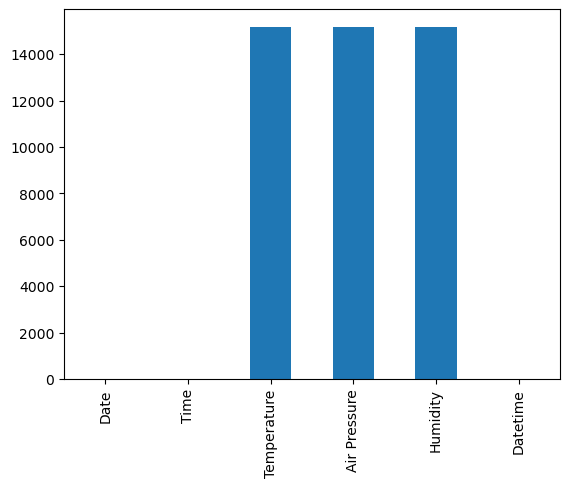

In [18]:
#visualizing the missing data

dataframe.isna().sum().plot.bar()

<AxesSubplot:xlabel='Date'>

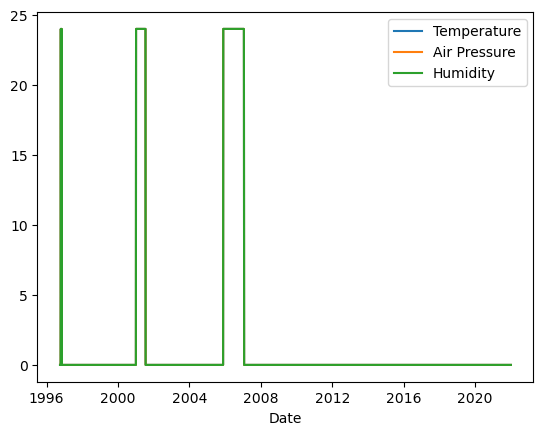

In [19]:
dataframe_na = dataframe.drop('Date', axis = 1).isna().groupby(dataframe.Date, sort = False).sum().reset_index()
dataframe_na.plot(x='Date', y=dataframe_na.columns[2:-1])

In [20]:
#cleaning up the missing data

dataframe = dataframe.dropna()

In [21]:
#using  datetime_is_numeric = True to get statistics on the datetime column

desc = dataframe.describe(datetime_is_numeric = True)

#forcing the printout not to use scientific notation

desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))

desc

,Temperature,Air Pressure,Humidity,Datetime
count,206179.0000,206179.0000,206179.0000,206179
mean,7.7766,1012.1892,76.6052,2009-09-19 21:13:44.627144448
min,-24.7000,954.9000,12.0000,1996-10-01 00:00:00
25%,1.4000,1005.2000,65.0000,2003-03-12 09:30:00
50%,7.4000,1012.6000,81.0000,2010-03-29 14:00:00
75%,14.4000,1019.7000,91.0000,2016-02-14 06:30:00
max,31.4000,1051.6000,100.0000,2021-12-31 23:00:00
std,8.4070,11.3705,17.8458,NaN


### Visualizing the data

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

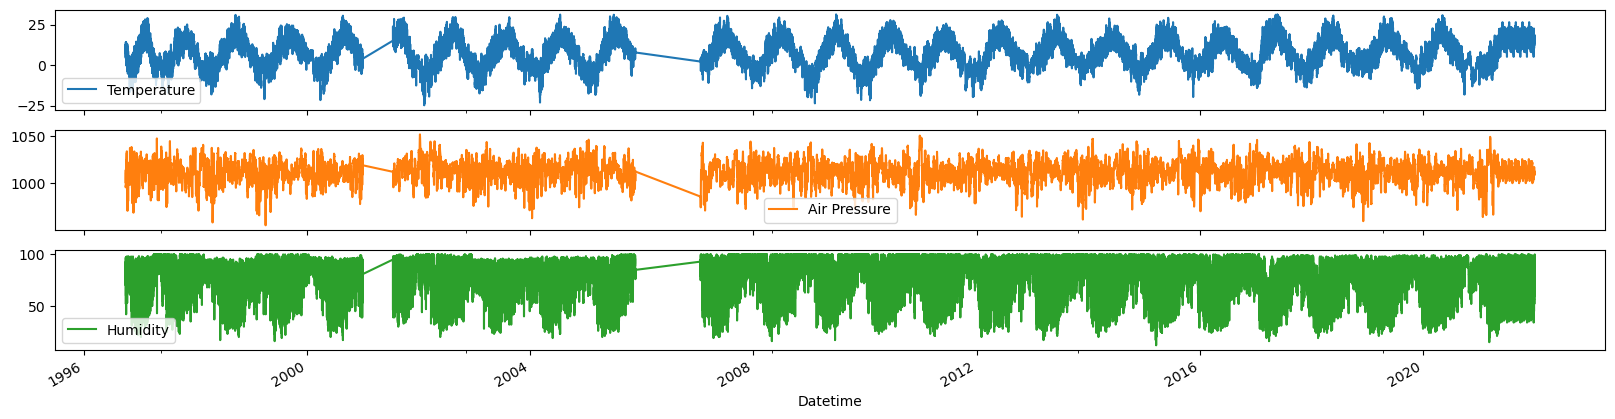

In [22]:
#for visualization of the data building the line chart here

dataframe.plot('Datetime', ['Temperature', 'Air Pressure', 'Humidity'], subplots = True, figsize = (20,5))

In [23]:
#computing the monthly average here

dataframe_avg = dataframe.groupby(pd.Grouper(key = "Datetime", freq = "1M")).mean()

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

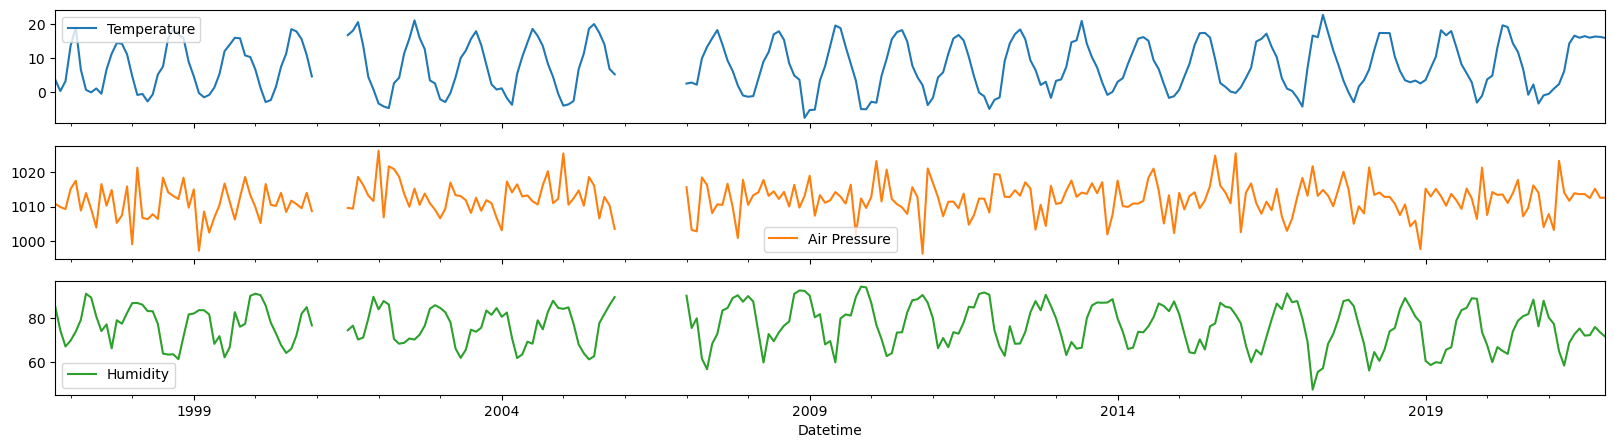

In [24]:
#building your linechart here

dataframe_avg.plot(y=['Temperature', 'Air Pressure', 'Humidity'], use_index = True, subplots = True, figsize = (20,5))

In [25]:
#computing your moving average here

dataframe[['temperature_monthly', 'air_pressure_monthly', 'humudity_monthly']] = dataframe[['Temperature', 'Air Pressure', 'Humidity']].rolling(24*60*30).mean()

array([<AxesSubplot:xlabel='Datetime'>, <AxesSubplot:xlabel='Datetime'>,
       <AxesSubplot:xlabel='Datetime'>], dtype=object)

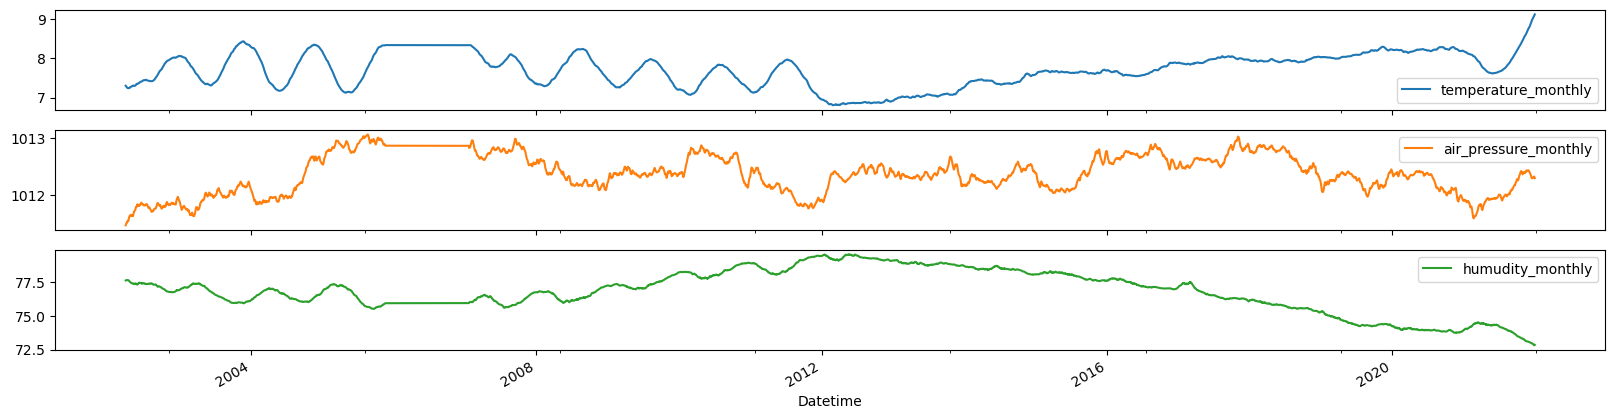

In [26]:
#building the line chart on the moving average

dataframe.plot('Datetime', ['temperature_monthly', 'air_pressure_monthly', 'humudity_monthly'],subplots = True, figsize = (20,5))

### Data Covariance and Correlation

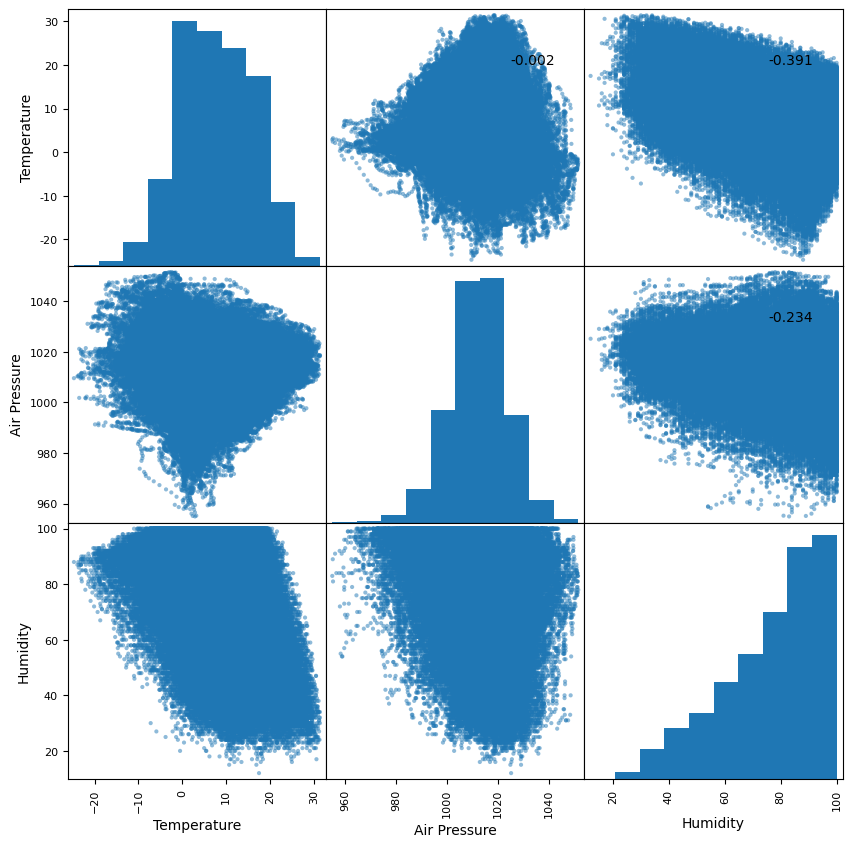

In [27]:
# Correlation Matrix for the three parameters 'Temperature', 'Air Pressure', 'Humidity'

axes = pd.plotting.scatter_matrix(dataframe[['Temperature', 'Air Pressure', 'Humidity']], alpha=0.5, figsize=[10, 10])

corr = dataframe[['Temperature', 'Air Pressure', 'Humidity']].corr(method='spearman').to_numpy()

for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" % corr[i, j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

plt.show()

In [28]:
#Cleaned data after the data processing and cleaning phase

dataframe.to_csv("Weather prediction cleaned data.csv")